## Packages
- install.packages('arules')
- install.packages('arulesViz')

## read.transactions( )
- format= -> Indica o tipo de tabela
- inspect( ) -> Retorna um resumo do arquivo
- image( ) -> Retorna uma imagem para visualização

transactions in sparse format with
 6 transactions (rows) and
 3 items (columns)

    items                    
[1] {Cerveja, Pizza, Sorvete}
[2] {Pizza, Sorvete}         
[3] {Cerveja, Pizza}         
[4] {Cerveja, Pizza, Sorvete}
[5] {Cerveja, Pizza}         
[6] {Pizza}                  


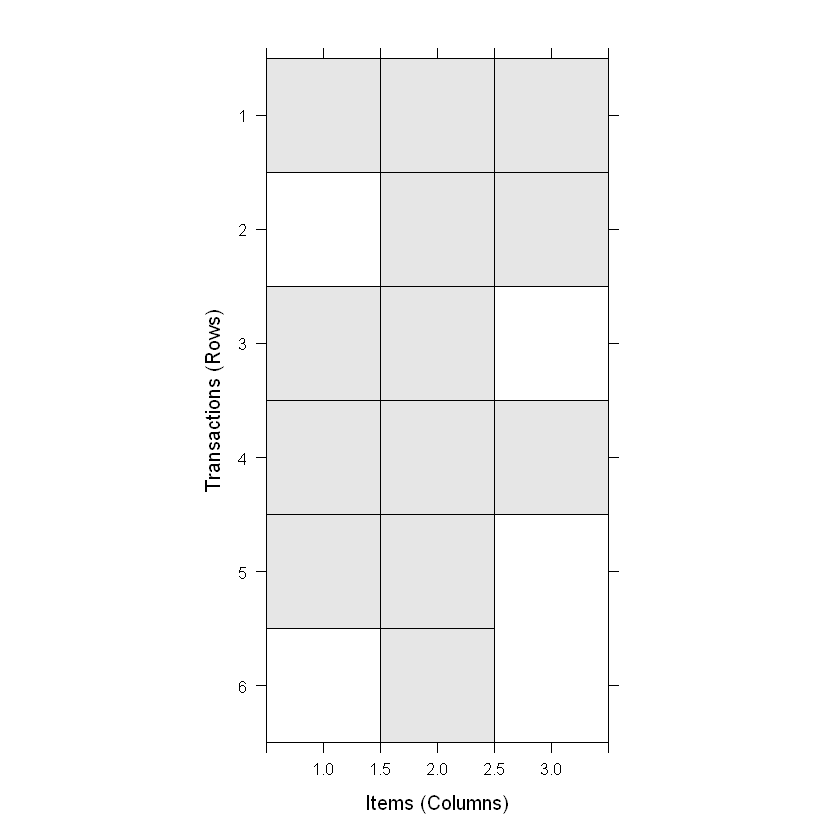

In [77]:
library(arules)
library(arulesViz)

data_ = read.transactions('transacoes.txt', sep=',', format='basket')
data_
inspect(data_)
image(data_)

## Associações | Mineiração
- apriori( ) -> Retorna associações
- supp= -> Indica valor mínimo para suporte
- conf= -> Indica valor mínimo para confiança
- minlen= -> Indica o tamanho mínimo da regra
- inspect( ) -> Retorna regras de associação geradas

In [78]:
regras = apriori(data_, parameter = list(supp=0.5, conf=0.5, minlen=2))
regras
summary(regras)
inspect(regras)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3 item(s), 6 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 4 rules 

set of 4 rules

rule length distribution (lhs + rhs):sizes
2 
4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support         confidence        coverage           lift       count    
 Min.   :0.5000   Min.   :0.5000   Min.   :0.5000   Min.   :1   Min.   :3.0  
 1st Qu.:0.5000   1st Qu.:0.6250   1st Qu.:0.6250   1st Qu.:1   1st Qu.:3.0  
 Median :0.5833   Median :0.8333   Median :0.8333   Median :1   Median :3.5  
 Mean   :0.5833   Mean   :0.7917   Mean   :0.7917   Mean   :1   Mean   :3.5  
 3rd Qu.:0.6667   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1   3rd Qu.:4.0  
 Max.   :0.6667   Max.   :1.0000   Max.   :1.0000   Max.   :1   Max.   :4.0  

mining info:
  data ntransactions support confidence
 data_             6     0.5        0.5
                                                                        call
 apriori(data = data_, parameter = list(supp = 0.5, conf = 0.5, minlen = 2))

    lhs          rhs       support   confidence coverage  lift count
[1] {Sorvete} => {Pizza}   0.5000000 1.0000000  0.5000000 1    3    
[2] {Pizza}   => {Sorvete} 0.5000000 0.5000000  1.0000000 1    3    
[3] {Cerveja} => {Pizza}   0.6666667 1.0000000  0.6666667 1    4    
[4] {Pizza}   => {Cerveja} 0.6666667 0.6666667  1.0000000 1    4    


## Visualização Gráfica

Itemsets in Antecedent (LHS)
[1] "{Sorvete}" "{Pizza}"   "{Cerveja}"
Itemsets in Consequent (RHS)
[1] "{Cerveja}" "{Sorvete}" "{Pizza}"  


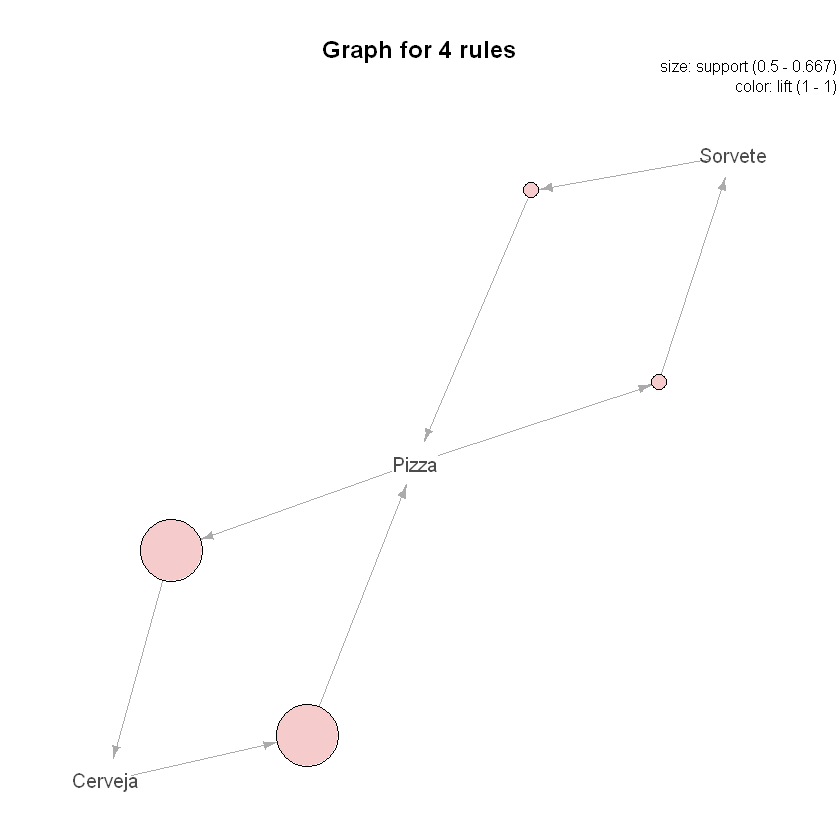

Itemsets in Antecedent (LHS)
[1] "{Sorvete}" "{Pizza}"   "{Cerveja}"
Itemsets in Consequent (RHS)
[1] "{Cerveja}" "{Sorvete}" "{Pizza}"  


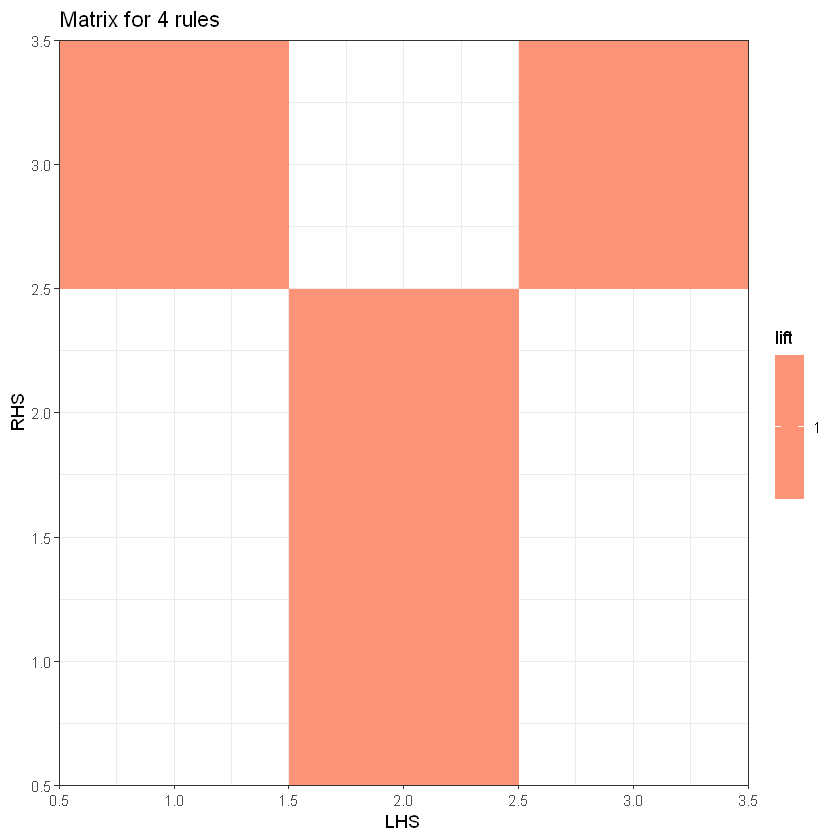

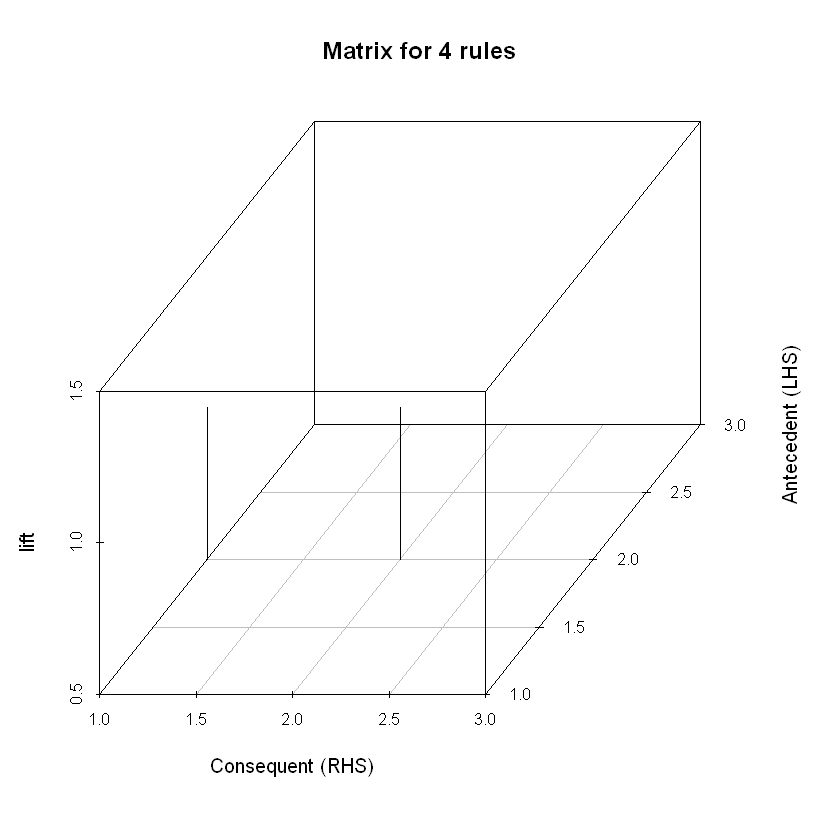

In [79]:
# Circunferências no gráfico informam o dado suporte
plot(regras, method='graph', engine='igraph')

plot(regras, method='matrix')
plot(regras, method='matrix', engine = '3d')

## Salvando Regras geradas

In [80]:
write.csv(DATAFRAME(regras), 'regras.csv')